In [1]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('C:\\Users\\welcome\\Desktop\\PYTHON\\TITANIC\\train.csv')
# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# We could also get overall info for the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<BarContainer object of 2 artists>

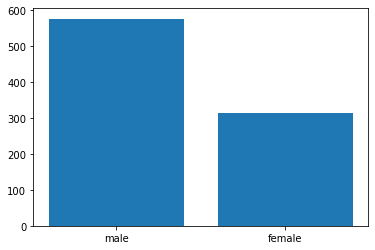

In [4]:

# Let's first check gender
x= titanic_df['Sex'].value_counts()
plt.bar(x.index, x.values)
#sns.catplot(x='Sex',y='PassengerId',data=titanic_df,kind='bar')




<AxesSubplot:xlabel='Pclass', ylabel='count'>

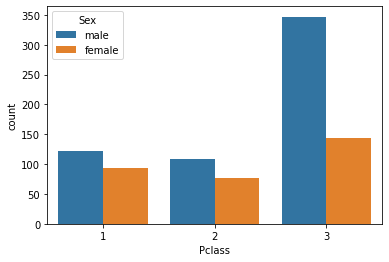

In [5]:

# Now let's seperate the genders by classes, remember we can use the 'hue' arguement
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')





In [6]:
def male_female_child(passenger):
 # Take the Age and Sex
 age,sex = passenger
 # Compare the age, otherwise leave the sex
 if age < 16:
     return 'child'
 else:
     return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [7]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


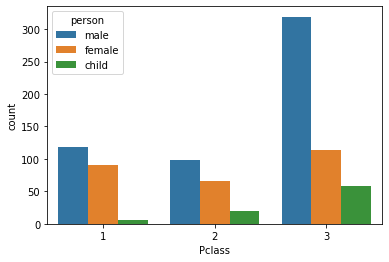

In [8]:
# Let's try the factorplot again!
g=sns.countplot(x='Pclass',data=titanic_df,hue='person')


<AxesSubplot:>

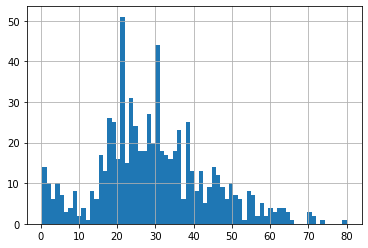

In [9]:
titanic_df['Age'].hist(bins=70)


In [10]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()



male      537
female    271
child      83
Name: person, dtype: int64

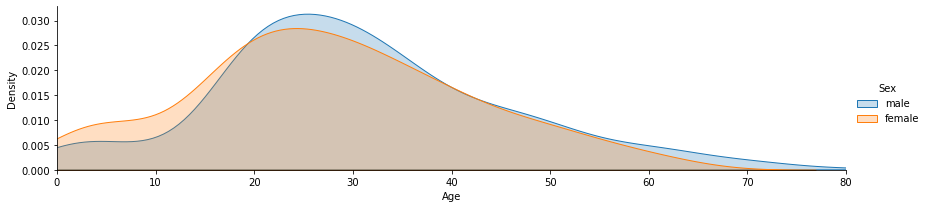

In [11]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots o
# Set the figure equal to a facetgrid with the pandas dataframe as its data source,
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# Next use map to plot all the possible kdeplots for the 'Age' column by the hue ch
fig.map(sns.kdeplot,'Age',shade= True)
# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()
#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))
#Finally add a legend
fig.add_legend()


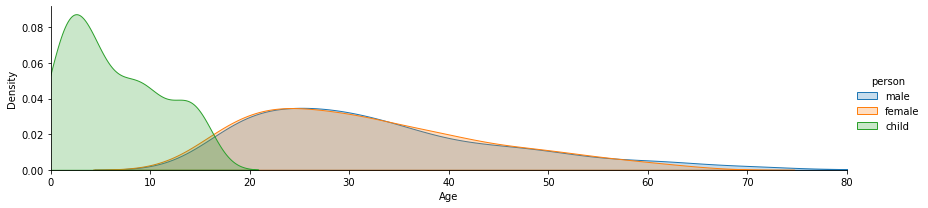

In [12]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


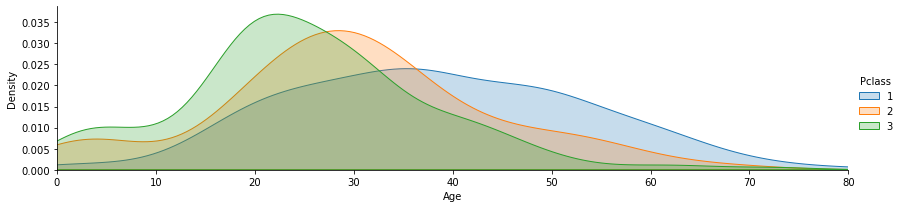

In [13]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


In [14]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

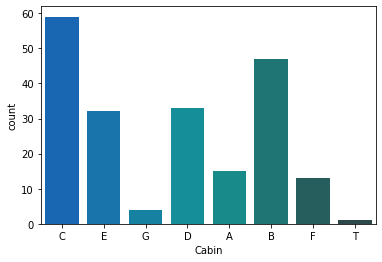

In [15]:
# So let's grab that letter for the deck level with a simple for loop
# Set empty list
levels = []
# Loop to grab first letter
for level in deck:
 levels.append(level[0])
# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x='Cabin', data=cabin_df, palette='winter_d')


In [16]:
cabin_df[0:80]

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
75,C
76,C
77,E
78,T


<AxesSubplot:xlabel='Cabin', ylabel='count'>

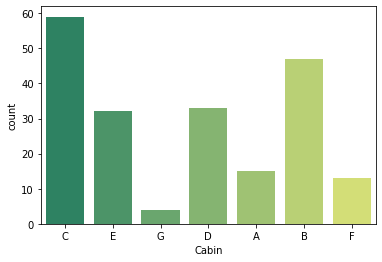

In [17]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin!= 'T']
#Replot
sns.countplot(x='Cabin',data=cabin_df,palette='summer')


<AxesSubplot:xlabel='Embarked', ylabel='count'>

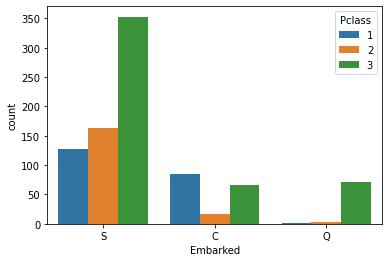

In [18]:
# Now we can make a quick factorplot to check out the results, note the x_order arg
sns.countplot(x='Embarked',data=titanic_df,hue='Pclass')

In [19]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [20]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


C:\Users\welcome\AppData\Local\Temp\ipykernel_4336\2185057729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [21]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

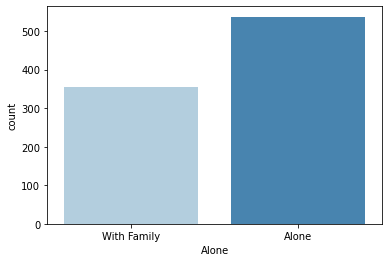

In [22]:
# Now let's get a simple visualization!
sns.countplot(x='Alone',data=titanic_df,palette='Blues')

<AxesSubplot:xlabel='Survivor', ylabel='count'>

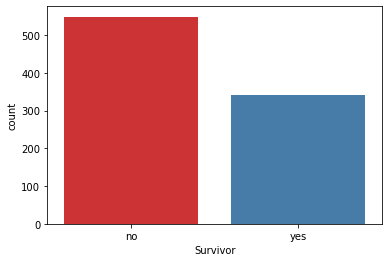

In [23]:
# Let's start by creating a new column for legibility purposes through mapping (Lec
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
# Let's just get a quick overall view of survied vs died.
sns.countplot(x='Survivor',data=titanic_df,palette='Set1')

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


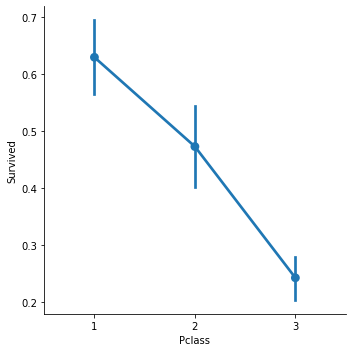

In [159]:
# Let's use a factor plot again, but now considering class
sns.factorplot(x='Pclass',y='Survived',data=titanic_df,)


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


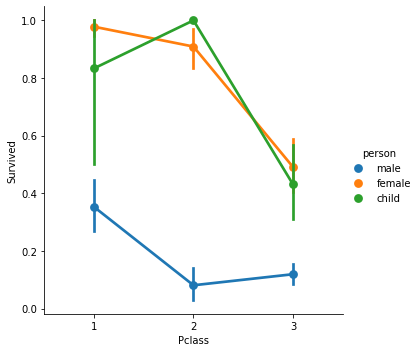

In [28]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot(x='Pclass',y='Survived',hue='person',data=titanic_df)


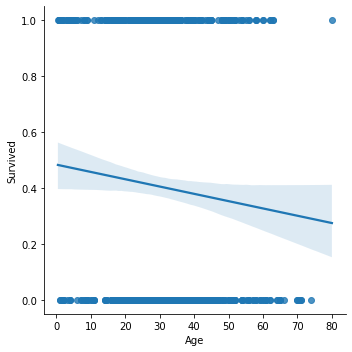

In [30]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)


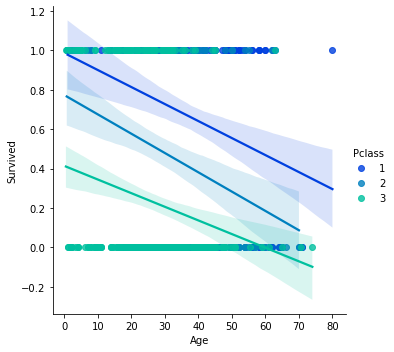

In [31]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

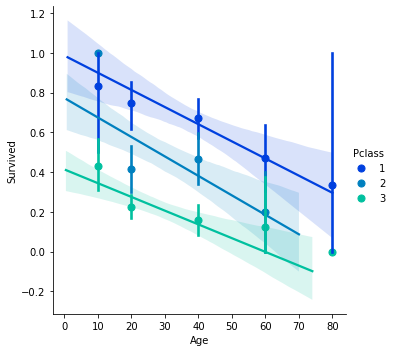

In [32]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)


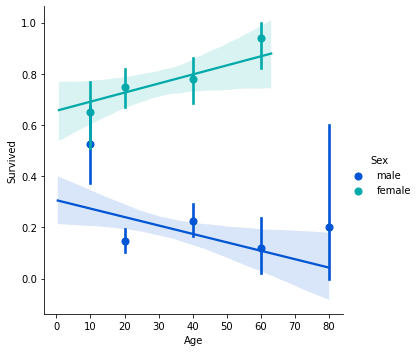

In [33]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [20]:
import numpy as np

data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Specify the format string to save integers as plain numbers (without scientific notation)
fmt = '%d'

# Save the 2D array as CSV with the specified format
np.savetxt('data.csv', data, delimiter=',', fmt=fmt)
